# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [2]:
# re-uploaded data as earlier uploaded data didn't have file permission

# Example snippet
#data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_owa.csv", header=TRUE)
data <- read.csv("/kaggle/input/anova-data/productivity_data_owa.csv", header=TRUE)
head(data)

,Sl_No,RemoteWorkSetting,ProductivityScore
,<int>,<chr>,<dbl>
1,0,Hybrid,93.08691
2,1,Coworking space,95.43247
3,2,Hybrid,71.42055
4,3,Hybrid,70.34142
5,4,Home office,64.21400
6,5,Hybrid,59.74954


*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

Skewness for Work Setting Hybrid : -0.1642834 


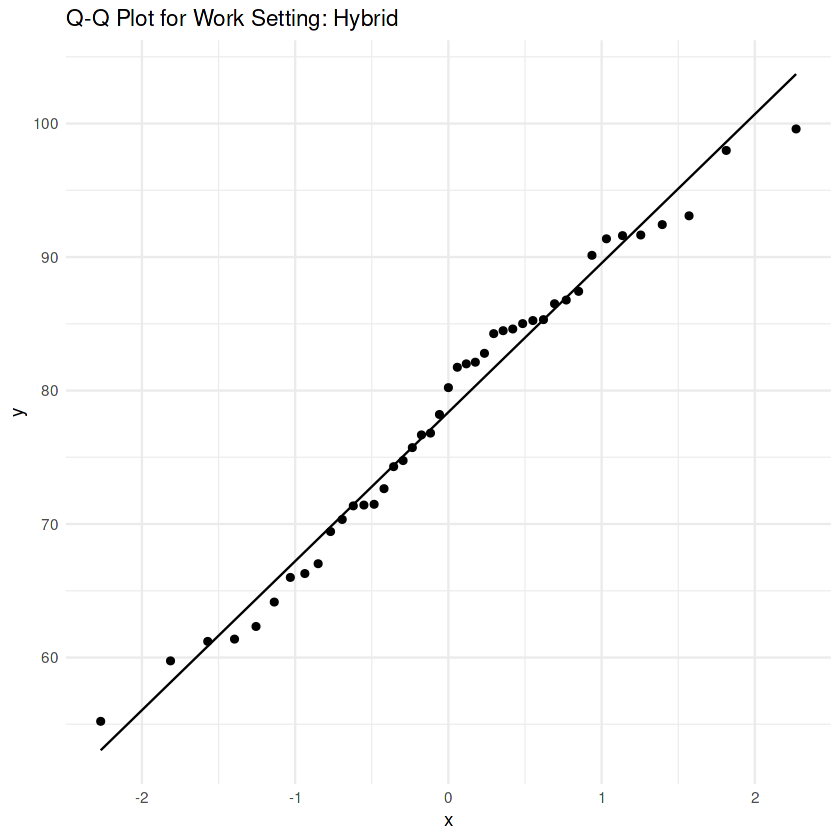

Skewness for Work Setting Coworking space : -0.4742426 


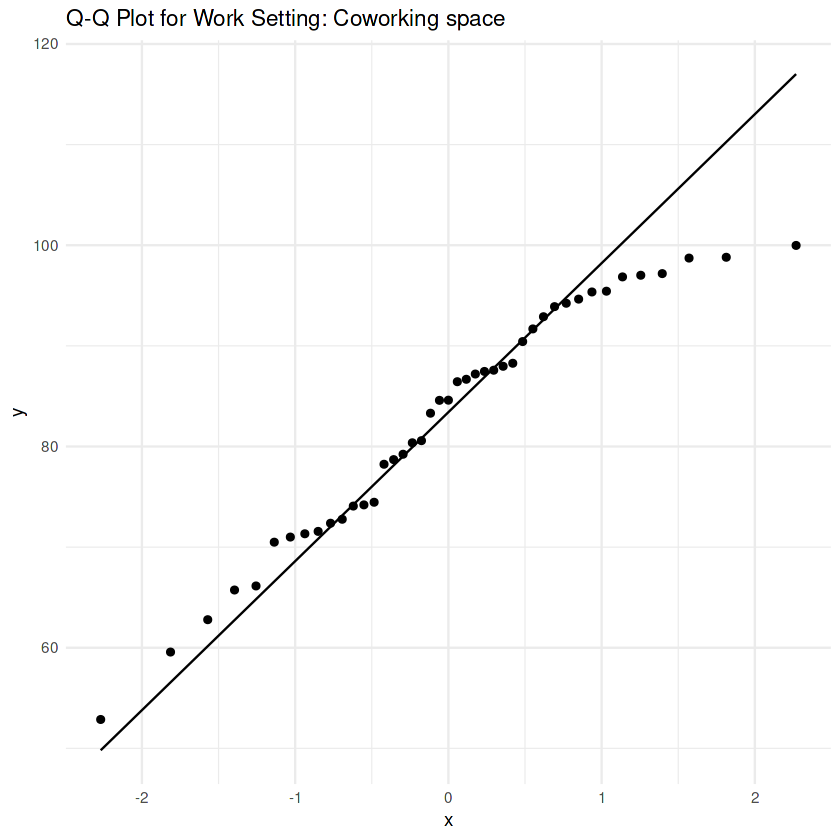

Skewness for Work Setting Home office : -0.007568926 


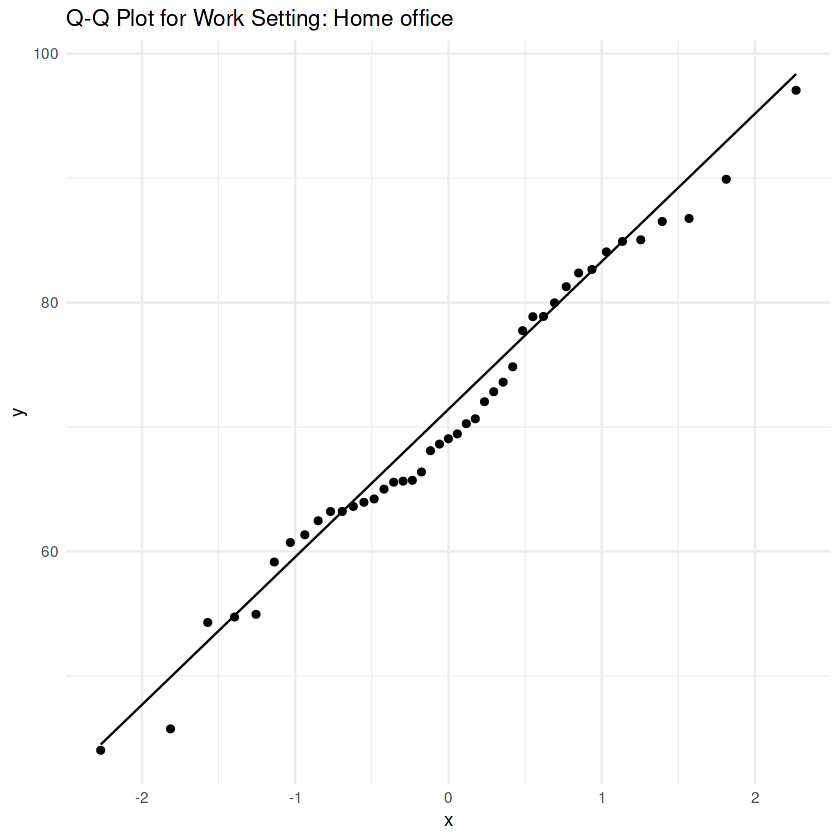

In [6]:
# Your answer here.

library(ggplot2)
library(moments)

data$RemoteWorkSetting <- as.factor(data$RemoteWorkSetting)

for (group in unique(data$RemoteWorkSetting)) 
{
    group_data <- subset(data, RemoteWorkSetting == group)$Productivity
    
    qq_plot <- ggplot(data.frame(sample = group_data), aes(sample = sample)) + stat_qq() + stat_qq_line() + ggtitle(paste("Q-Q Plot for Work Setting:", group)) + theme_minimal()
    print(qq_plot)
    skewness_value <- skewness(group_data, na.rm = TRUE)
    cat("Skewness for Work Setting", group, ":", skewness_value, "\n")
}

# answer is in the markdown below 

Skewness :-

- For Hybrid setting, a skewness of -0.164 indicates a slight leftward skew (negative skew). This means that the left tail of the distribution is slightly longer or more spread out than the right tail. However, since the magnitude is small, the skew is not severe.
- For Coworking space setting, a skewness value of -0.47 indicates that the distribution has a slight leftward skew. The value of -0.47 is considered moderate. It's not extreme, but it's higher than Hybrid setting.
- For Home office setting, skewness value of -0.00756 is extremely close to zero, indicating that the distribution is nearly symmetric.

*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


# Your answer here.

To determine if the work setting has any effect on productivity, we can use a statistical method called Analysis of Variance (ANOVA). ANOVA is used to compare the means of three or more independent groups to see if there is a statistically significant difference between them.

multiple t-test:-

A t-test is typically used to compare the means of two groups. If you have more than two groups (which is often the case in comparing different work settings), a t-test would not be appropriate because you'd need to perform multiple t-tests, increasing the likelihood of Type I error (false positives).

For example we compare :-

- Compare mean productivity of Hybrid and Coworking space,
  -  Test A :-  H0 : μ0 = μ1, H1 : μ0 ≠ μ1

- Compare mean productivity of Hybrid and Home office,
  - Test B :-  H0 : μ0 = μ2, H1 : μ0 ≠ μ2

- Compare mean productivity of Coworking space and Home office,
  - Test C :-  H0 : μ1 = μ2, H1 : μ1 ≠ μ2
  
Note values P(A) = P(B) = P(C) = 1 - α = 1 - 0.05 = 0.95

The conditional probablity of simultanously retaining all 3 null hypothesis is probablity of P(A ∩ B ∩ C) = 0.8573

If we retain null hypothesis based of 3 individual t-test like above then type 1 error is 1 - 0.8573 = 0.1426 (1 - (1 - α)^n). Hence t-test is inappropriate so we should use ANOVA.

*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [8]:
# Your answer here.

# ANOVA

data$RemoteWorkSetting <- as.factor(data$RemoteWorkSetting)

anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data)

summary(anova_result)

# tukey test 

if(summary(anova_result)[[1]][["Pr(>F)"]][1] < 0.05) 
{
  posthoc <- TukeyHSD(anova_result)
  print(posthoc)
}

# answer is in the markdown below

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685



Inference :-

From the tukey test we infer the productivity differs in these categories because the p-value of these are less than 0.05

- Home office-Coworking space
- Hybrid-Home office

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [10]:
# your answer here

# re-uploaded data as earlier uploaded data didn't have file permission

#data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_twa.csv", header=TRUE)
data <- read.csv("/kaggle/input/anova-data/productivity_data_twa.csv", header=TRUE)
head(data)

data$RemoteWorkSetting <- as.factor(data$RemoteWorkSetting)
data$CommunicationTool <- as.factor(data$CommunicationTool)

anova_interaction <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data)

summary(anova_interaction)

# answer is in the markdown below

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Interpretation :-

- The p-value for the RemoteWorkSetting is 6.27e-06, which is much less than the significance level of 0.05. This indicates that the remote work setting has a significant impact on productivity. Therefore, we can conclude that different remote work settings lead to different productivity outcomes.
- The p-value for CommunicationTool is 0.0683, which is slightly above the significance level of 0.05. This suggests that the choice of communication tool does not have a statistically significant impact on productivity, although it is close to being significant.
- The p-value for the interaction between RemoteWorkSetting and CommunicationTool is 0.1454, which is greater than 0.05. This indicates that there is no statistically significant interaction effect between the remote work setting and the communication tools on productivity.

In [ ]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
#data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_twa.csv", header=TRUE)
# head(data)

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


# your answer here.

Based on the previous analysis, Remote Work Setting has been shown to significantly impact productivity. Although Communication Tool did not show a statistically significant effect on productivity, its interaction with the work setting is also not significant, meaning that no particular combination stands out dramatically in affecting productivity.

Given the significant effect of the work setting :-

- Work Setting :- Since the work setting significantly influences productivity, you might prioritize settings like Home Office or Hybrid work models, which often balance productivity with flexibility.
- Communication Tool :- While no single communication tool stands out, we can choose tools that ensure smooth collaboration and communication across remote teams.

As an entrepreneur I would likely adopt a Hybrid Work Model paired with a versatile communication tool to give my team work life balance.

Name of my company would be 'Fluid Works'.

*fin*